# Лабораторная работа 4

## Подготовка

### Библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.linear_model import Lasso

In [6]:
from sklearn.linear_model import Ridge

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn.metrics import r2_score

### Загрузка датасета

In [10]:
df = pd.read_csv('filtered.csv', sep = ',', low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299386 entries, 0 to 299385
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   299386 non-null  int64  
 1   Depthm       299386 non-null  float64
 2   T_degC       299386 non-null  float64
 3   Salnty       299386 non-null  float64
 4   O2ml_L       299386 non-null  float64
 5   STheta       299386 non-null  float64
 6   O2Sat        299386 non-null  float64
 7   Oxy_µmol/Kg  299386 non-null  float64
 8   RecInd       299386 non-null  float64
 9   T_prec       299386 non-null  float64
 10  S_prec       299386 non-null  float64
 11  P_qual       299386 non-null  float64
 12  SiO3qu       299386 non-null  float64
 13  NO2q         299386 non-null  float64
 14  NO3q         299386 non-null  float64
 15  R_Depth      299386 non-null  float64
 16  R_TEMP       299386 non-null  float64
 17  R_POTEMP     299386 non-null  float64
 18  R_SALINITY   299386 non-

### Выбор данных для построения модели

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

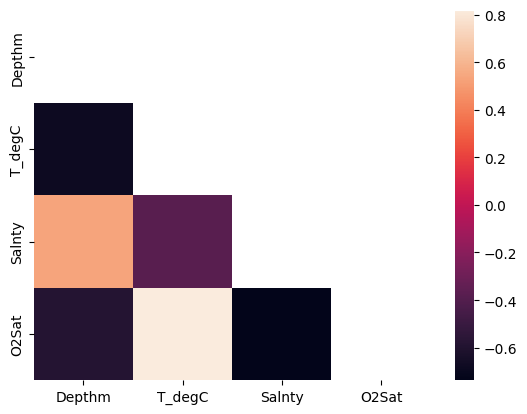

In [11]:
corr = df[['Depthm','T_degC','Salnty','O2Sat']].corr()
plt.figure()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot = True, fmt = '.1g', mask = mask)

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Depthm', ylabel='Salnty'>

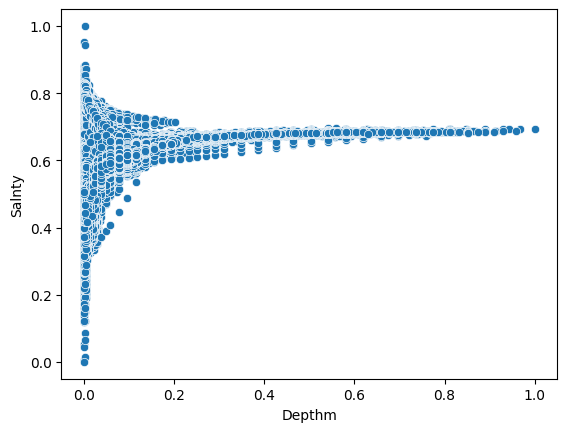

In [12]:
sns.scatterplot(y = df['Salnty'], x = df['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='O2Sat', ylabel='T_degC'>

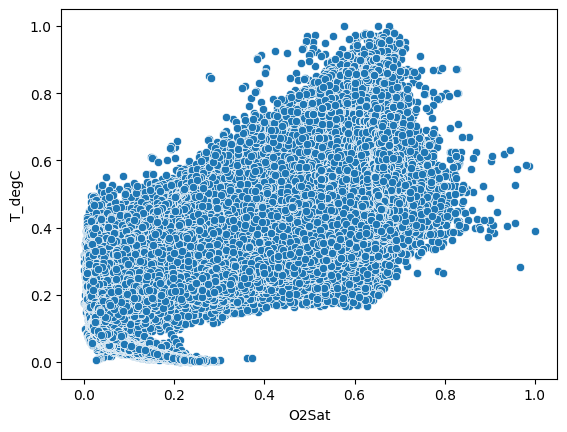

In [13]:
sns.scatterplot(y = df['T_degC'], x = df['O2Sat'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='T_degC', ylabel='Salnty'>

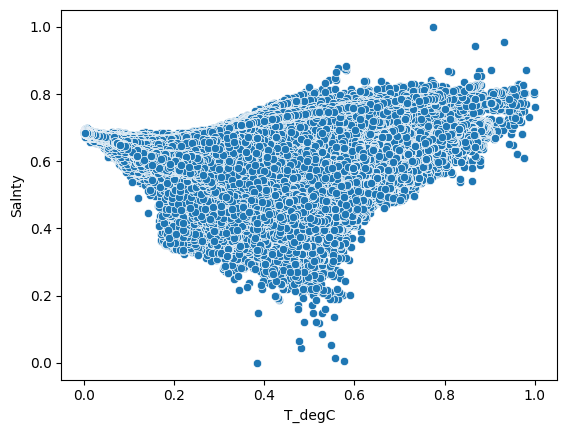

In [14]:
sns.scatterplot(y = df['Salnty'], x = df['T_degC'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Depthm', ylabel='T_degC'>

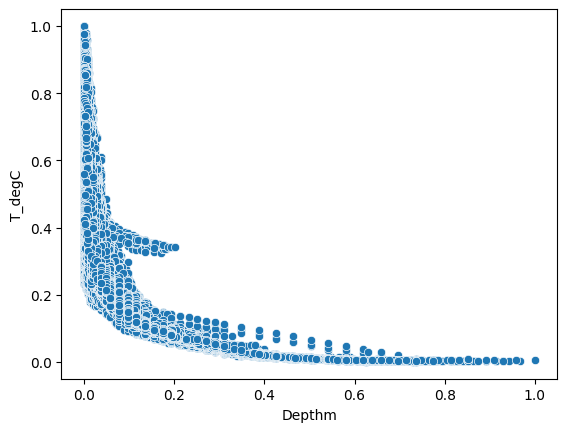

In [15]:
sns.scatterplot(y = df['T_degC'], x = df['Depthm'])

### Деление на обучающие и тестовые множества

In [16]:
x = df[['Depthm','T_degC','Salnty','O2Sat']]
x_training_data, x_test_data = train_test_split(x, test_size = 0.5)

## Обучение моделей и подбор параметров

### Соленость от глубины

#### Метод наименьших квадратов

In [17]:
lin_S = LinearRegression()

In [18]:
lin_S.fit(x_training_data['Depthm'].values.reshape(-1,1), x_training_data['Salnty'].values.reshape(-1,1))

LinearRegression()

In [19]:
lin_S_res = lin_S.predict(x_test_data['Depthm'].values.reshape(-1,1))

#### LASSO

In [20]:
grid_las_S = GridSearchCV(estimator = Lasso(), param_grid = {'alpha':[0.001, 0.01, 0.1, 0.5, 0.9]})

In [21]:
grid_las_S.fit(x_training_data['Depthm'].values.reshape(-1,1), x_training_data['Salnty'].values.reshape(-1,1))

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.9]})

In [22]:
las_S = grid_las_S.best_estimator_

In [23]:
las_res_S = las_S.predict(x_test_data['Depthm'].values.reshape(-1,1))

#### Ридж-регрессия

In [24]:
grid_rid_S = GridSearchCV(estimator = Ridge(), param_grid = {'alpha':[0.001, 0.01, 0.1, 0.5, 0.9]})

In [25]:
grid_rid_S.fit(x_training_data['Depthm'].values.reshape(-1,1), x_training_data['Salnty'].values.reshape(-1,1))

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.9]})

In [26]:
rid_S = grid_rid_S.best_estimator_

In [27]:
rid_res_S = rid_S.predict(x_test_data['Depthm'].values.reshape(-1,1))

#### Полиномальный МНК 2 степени

In [28]:
poly_train2_S = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_training_data['Depthm'].values.reshape(-1,1))

In [29]:
lin2_S = LinearRegression()

In [30]:
lin2_S.fit(poly_train2_S, x_training_data['Salnty'].values.reshape(-1,1))

LinearRegression()

In [31]:
poly_test2_S = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test_data['Depthm'].values.reshape(-1,1))

In [32]:
lin2_res_S = lin2_S.predict(poly_test2_S)

#### Полиномальный МНК 3 степени

In [33]:
poly_train3_S = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_training_data['Depthm'].values.reshape(-1,1))

In [34]:
lin3_S = LinearRegression()

In [35]:
lin3_S.fit(poly_train3_S, x_training_data['Salnty'].values.reshape(-1,1))

LinearRegression()

In [36]:
poly_test3_S = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_test_data['Depthm'].values.reshape(-1,1))

In [37]:
lin3_res_S = lin3_S.predict(poly_test3_S)

### Температура от глубины

#### Метод наименьших квадратов

In [38]:
lin_T = LinearRegression()

In [39]:
lin_T.fit(x_training_data['Depthm'].values.reshape(-1,1), x_training_data['T_degC'].values.reshape(-1,1))

LinearRegression()

In [40]:
lin_T_res = lin_T.predict(x_test_data['Depthm'].values.reshape(-1,1))

#### LASSO

In [41]:
grid_las_T = GridSearchCV(estimator = Lasso(), param_grid = {'alpha':[0.001, 0.01, 0.1, 0.5, 0.9]})

In [42]:
grid_las_T.fit(x_training_data['Depthm'].values.reshape(-1,1), x_training_data['T_degC'].values.reshape(-1,1))

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.9]})

In [43]:
las_T = grid_las_T.best_estimator_

In [44]:
las_res_T = las_T.predict(x_test_data['Depthm'].values.reshape(-1,1))

#### Ридж-регрессия

In [45]:
grid_rid_T = GridSearchCV(estimator = Ridge(), param_grid = {'alpha':[0.001, 0.01, 0.1, 0.5, 0.9]})

In [46]:
grid_rid_T.fit(x_training_data['Depthm'].values.reshape(-1,1), x_training_data['T_degC'].values.reshape(-1,1))

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.9]})

In [47]:
rid_T = grid_rid_T.best_estimator_

In [48]:
rid_res_T = rid_T.predict(x_test_data['Depthm'].values.reshape(-1,1))

#### Полиномальный МНК 2 степени

In [49]:
poly_train2_T = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_training_data['Depthm'].values.reshape(-1,1))

In [50]:
lin2_T = LinearRegression()

In [51]:
lin2_T.fit(poly_train2_T, x_training_data['T_degC'].values.reshape(-1,1))

LinearRegression()

In [52]:
poly_test2_T = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test_data['Depthm'].values.reshape(-1,1))

In [53]:
lin2_res_T = lin2_T.predict(poly_test2_T)

#### Полиномальный МНК 3 степени

In [54]:
poly_train3_T = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_training_data['Depthm'].values.reshape(-1,1))

In [55]:
lin3_T = LinearRegression()

In [56]:
lin3_T.fit(poly_train3_T, x_training_data['T_degC'].values.reshape(-1,1))

LinearRegression()

In [57]:
poly_test3_T = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_test_data['Depthm'].values.reshape(-1,1))

In [58]:
lin3_res_T = lin3_T.predict(poly_test3_T)

## Оценка моделей

1. **Прямая (Уравнение модели):**
   - Уравнение модели (прямая в случае линейной регрессии или полином в случае полиномиальной регрессии) позволяет вам выразить зависимость между независимой переменной и предсказываемым значением. Например, в вашем случае:
     ```markdown
     Y = b₀ + b₁ * X + b₂ * X²
     ```
   - Это уравнение полинома второй степени, где `Y` - предсказываемая соленость, а `X` - глубина.

2. **СКО (Среднеквадратическое отклонение):**
   - СКО измеряет среднюю величину ошибок между фактическими и предсказанными значениями. Чем меньше СКО, тем ближе предсказания модели к фактическим данным.
   - Формула для СКО:
     ```markdown
     СКО = sqrt((1/n) * Σ(yᵢ - ŷᵢ)²)
     ```
   - Где `n` - количество наблюдений

3. **\(R^2\) (Коэффициент детерминации):**
   - \(R^2\) измеряет долю дисперсии зависимой переменной, объясненную моделью. Диапазон значений \(R^2\) от 0 до 1, где 1 указывает на идеальное соответствие модели данным.
   - Формула для \(R^2\):
     ```markdown
     R² = 1 - Σ(yᵢ - ŷᵢ)² / Σ(yᵢ - ȳ)²
     ```
   - Где \(ȳ\) - среднее фактических значений. \(R^2\) равно 1, если модель идеально предсказывает данные, и равно 0, если модель не предсказывает лучше, чем просто среднее значение.


### Соленость от глубины

#### Линейная регрессия

In [59]:
b0 = lin_S_res.ravel()[x_test_data['Depthm'].argmin()]
b1 = lin_S.coef_.ravel()[0]
print('Прямая: Y =', b0, '+', b1, 'x')
print('СКО =', mean_squared_error(x_test_data['Salnty'], lin_S_res.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['Salnty'], lin_S_res.ravel()))

Прямая: Y = 0.5347946558680633 + 0.5887707167720366 x
СКО = 0.004214433356178016
Коэффициент детерминации R2 = 0.2841815186843826


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='Salnty'>

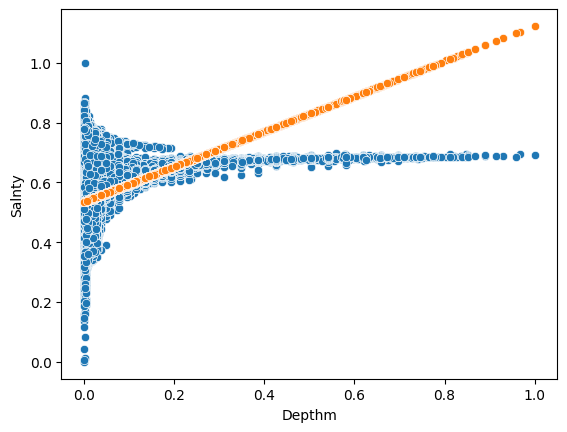

In [60]:
sns.scatterplot(y = x_test_data['Salnty'], x = x_test_data['Depthm'])
sns.scatterplot(y = lin_S_res.ravel(), x = x_test_data['Depthm'])

как сильно отличаются предсказанные значения солености от фактических значений, и как это отклонение распределено по предсказанным значениям.

Ось y (вертикальная): Представляет разницу между фактическими значениями солености и предсказанными значениями солености. Если точка находится выше нуля, это означает, что модель предсказала значение солености, которое выше фактического значения, и наоборот.

Ось x (горизонтальная): Представляет предсказанные значения солености. Таким образом, график показывает, как отличие между фактическими и предсказанными значениями распределяется по диапазону предсказанных значений.

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Salnty'>

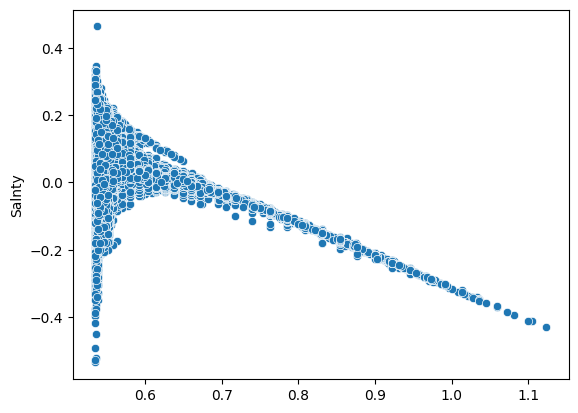

In [61]:
sns.scatterplot(y = x_test_data['Salnty'] - lin_S_res.ravel(), x = lin_S_res.ravel())

#### LASSO

In [62]:
b0 = las_res_S.ravel()[x_test_data['Depthm'].argmin()]
b1 = las_S.coef_.ravel()[0]
print('Прямая: Y =', b0, '+', b1, 'x')
print('СКО =', mean_squared_error(x_test_data['Salnty'], las_res_S.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['Salnty'], las_res_S.ravel()))

Прямая: Y = 0.5455057325527621 + 0.38107024050812444 x
СКО = 0.004423647121602976
Коэффициент детерминации R2 = 0.24864671075645983


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='Salnty'>

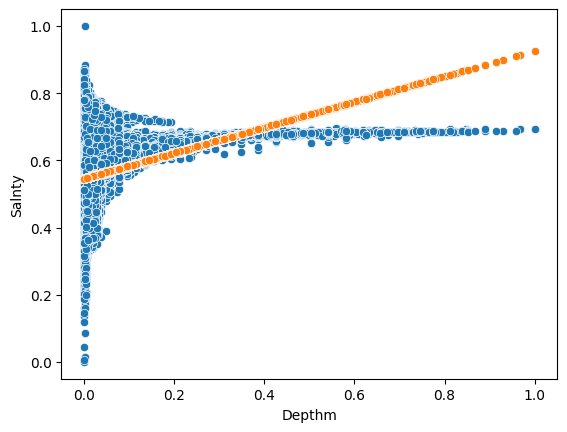

In [63]:
sns.scatterplot(y = x_test_data['Salnty'], x = x_test_data['Depthm'])
sns.scatterplot(y = las_res_S.ravel(), x = x_test_data['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Salnty'>

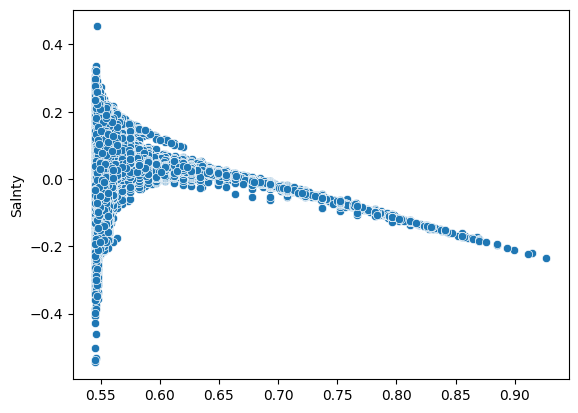

In [64]:
sns.scatterplot(y = x_test_data['Salnty'] - las_res_S.ravel(), x = las_res_S.ravel())

#### Ридж-регрессия

In [65]:
b0 = rid_res_S.ravel()[x_test_data['Depthm'].argmin()]
b1 = rid_S.coef_.ravel()[0]
print('Прямая: Y =', b0, '+', b1, 'x')
print('СКО =', mean_squared_error(x_test_data['Salnty'], rid_res_S.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['Salnty'], rid_res_S.ravel()))

Прямая: Y = 0.534798868151477 + 0.5886890356024443 x
СКО = 0.004214433990384168
Коэффициент детерминации R2 = 0.28418141096492266


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='Salnty'>

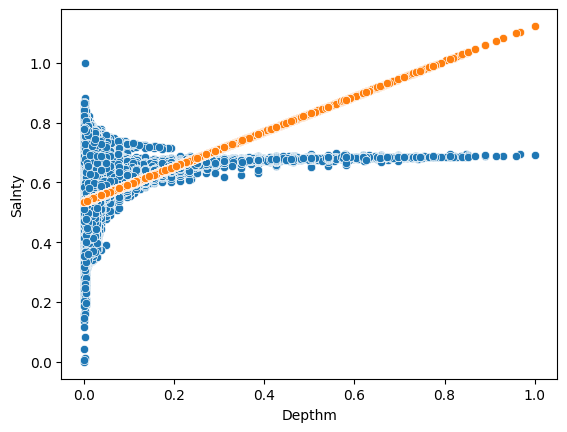

In [66]:
sns.scatterplot(y = x_test_data['Salnty'], x = x_test_data['Depthm'])
sns.scatterplot(y = rid_res_S.ravel(), x = x_test_data['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Salnty'>

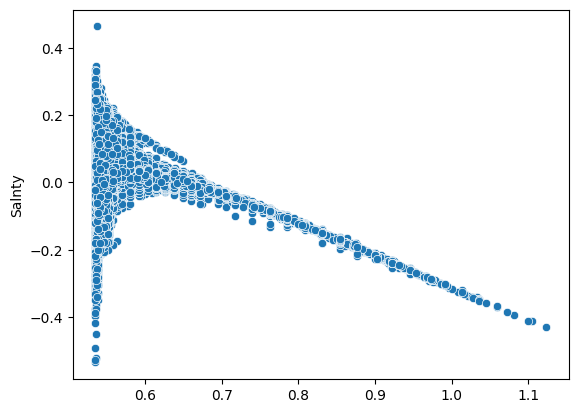

In [67]:
sns.scatterplot(y = x_test_data['Salnty'] - rid_res_S.ravel(), x = rid_res_S.ravel())

#### Полиномальная регрессия 2 степени

In [68]:
b0 = lin2_res_S.ravel()[x_test_data['Depthm'].argmin()]
b1 = lin2_S.coef_.ravel()[0]
b2 = lin2_S.coef_.ravel()[1]
print('Прямая: Y =', b0, '+', b1, 'x +', b2, 'x^2')
print('СКО =', mean_squared_error(x_test_data['Salnty'], lin2_res_S.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['Salnty'], lin2_res_S.ravel()))

Прямая: Y = 0.5173586464869029 + 1.1476147894700632 x + -1.5230626842384487 x^2
СКО = 0.003616710133010128
Коэффициент детерминации R2 = 0.3857043792198098


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='Salnty'>

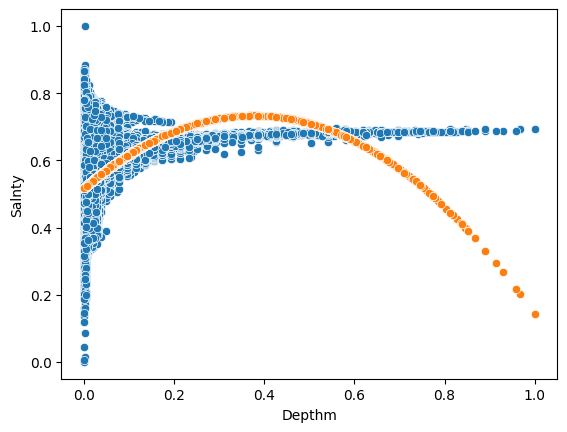

In [69]:
sns.scatterplot(y = x_test_data['Salnty'], x = x_test_data['Depthm'])
sns.scatterplot(y = lin2_res_S.ravel(), x = x_test_data['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Salnty'>

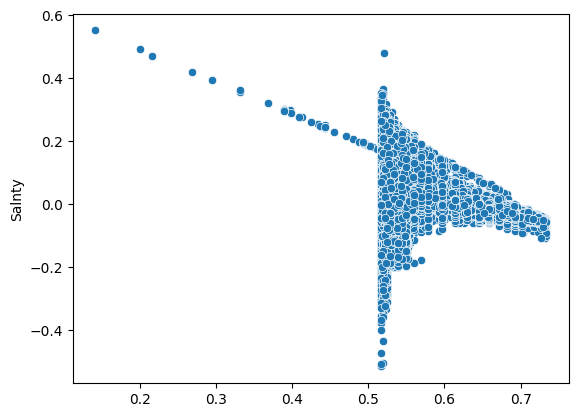

In [70]:
sns.scatterplot(y = x_test_data['Salnty'] - lin2_res_S.ravel(), x = lin2_res_S.ravel())

#### Полиномальная регрессия 3 степени

In [71]:
b0 = lin3_res_S.ravel()[x_test_data['Depthm'].argmin()]
b1 = lin3_S.coef_.ravel()[0]
b2 = lin3_S.coef_.ravel()[1]
b3 = lin3_S.coef_.ravel()[2]
print('Прямая: Y =', b0, '+', b1, 'x +', b2, 'x^2 +', b3, 'x^3')
print('СКО =', mean_squared_error(x_test_data['Salnty'], lin3_res_S.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['Salnty'], lin3_res_S.ravel()))

Прямая: Y = 0.5058474180096704 + 1.7303182500955 x + -5.319865366999492 x^2 + 4.571922405988838 x^3
СКО = 0.003393132692221474
Коэффициент детерминации R2 = 0.42367884710103987


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='Salnty'>

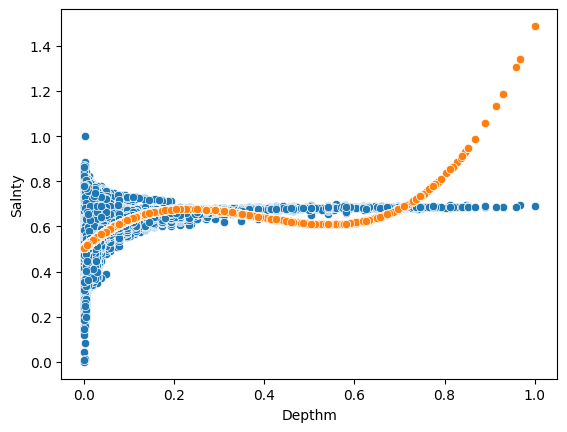

In [72]:
sns.scatterplot(y = x_test_data['Salnty'], x = x_test_data['Depthm'])
sns.scatterplot(y = lin3_res_S.ravel(), x = x_test_data['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Salnty'>

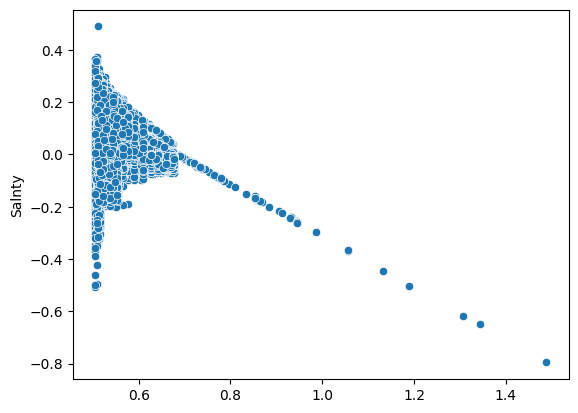

In [73]:
sns.scatterplot(y = x_test_data['Salnty'] - lin3_res_S.ravel(), x = lin3_res_S.ravel())

### Температура от глубины

#### Линейная регрессия

In [74]:
b0 = lin_T_res.ravel()[x_test_data['Depthm'].argmin()]
b1 = lin_T.coef_.ravel()[0]
print('Прямая: Y =', b0, '+', b1, 'x')
print('СКО =', mean_squared_error(x_test_data['T_degC'], lin_T_res.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['T_degC'], lin_T_res.ravel()))

Прямая: Y = 0.3866773561706669 + -1.507919064481052 x
СКО = 0.012552190782149406
Коэффициент детерминации R2 = 0.4671025878432211


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='T_degC'>

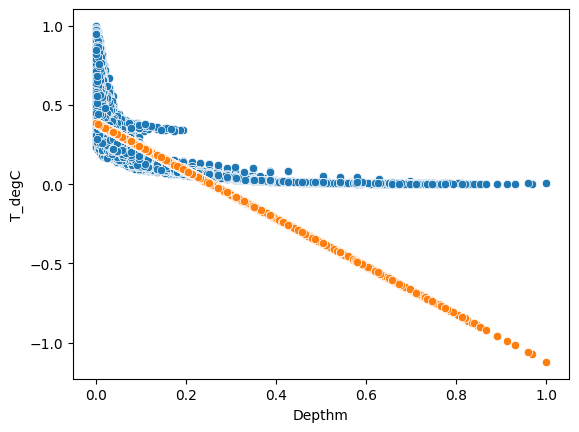

In [75]:
sns.scatterplot(y = x_test_data['T_degC'], x = x_test_data['Depthm'])
sns.scatterplot(y = lin_T_res.ravel(), x = x_test_data['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='T_degC'>

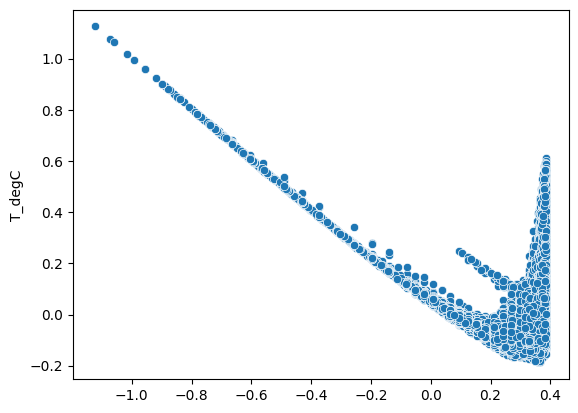

In [76]:
sns.scatterplot(y = x_test_data['T_degC'] - lin_T_res.ravel(), x = lin_T_res.ravel())

#### LASSO

In [77]:
b0 = las_res_T.ravel()[x_test_data['Depthm'].argmin()]
b1 = las_T.coef_.ravel()[0]
print('Прямая: Y =', b0, '+', b1, 'x')
print('СКО =', mean_squared_error(x_test_data['T_degC'], las_res_T.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['T_degC'], las_res_T.ravel()))

Прямая: Y = 0.3759662794859611 + -1.300218588217005 x
СКО = 0.012767556166599567
Коэффициент детерминации R2 = 0.4579593507754056


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='T_degC'>

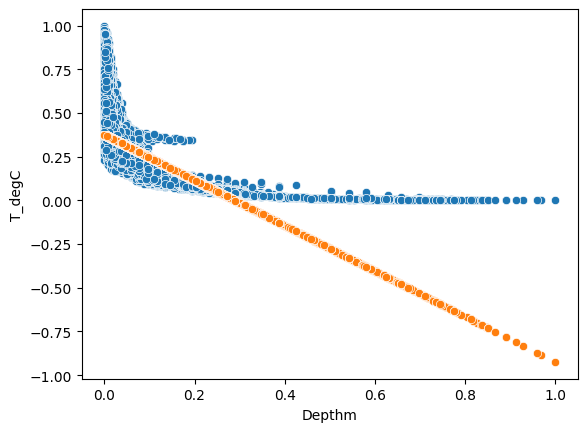

In [78]:
sns.scatterplot(y = x_test_data['T_degC'], x = x_test_data['Depthm'])
sns.scatterplot(y = las_res_T.ravel(), x = x_test_data['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='T_degC'>

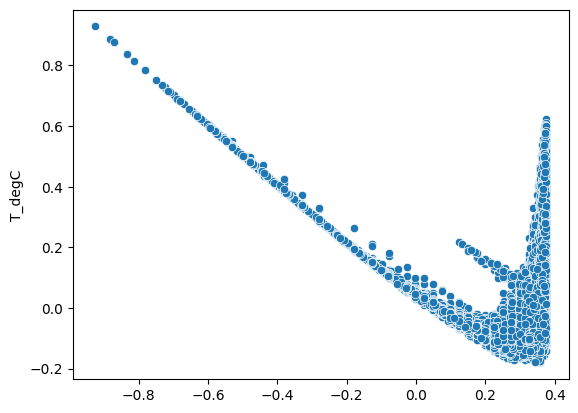

In [79]:
sns.scatterplot(y = x_test_data['T_degC'] - las_res_T.ravel(), x = las_res_T.ravel())

#### Ридж-регрессия

In [80]:
b0 = rid_res_T.ravel()[x_test_data['Depthm'].argmin()]
b1 = rid_T.coef_.ravel()[0]
print('Прямая: Y =', b0, '+', b1, 'x')
print('СКО =', mean_squared_error(x_test_data['T_degC'], rid_res_T.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['T_degC'], rid_res_T.ravel()))

Прямая: Y = 0.38662344503464574 + -1.5068736636350744 x
СКО = 0.012552234711676411
Коэффициент детерминации R2 = 0.4671007228356169


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='T_degC'>

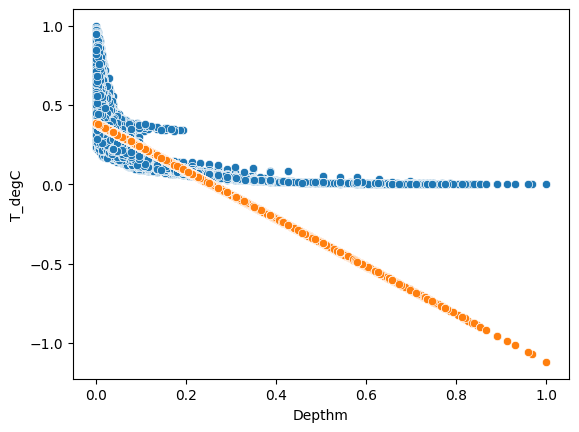

In [81]:
sns.scatterplot(y = x_test_data['T_degC'], x = x_test_data['Depthm'])
sns.scatterplot(y = rid_res_T.ravel(), x = x_test_data['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='T_degC'>

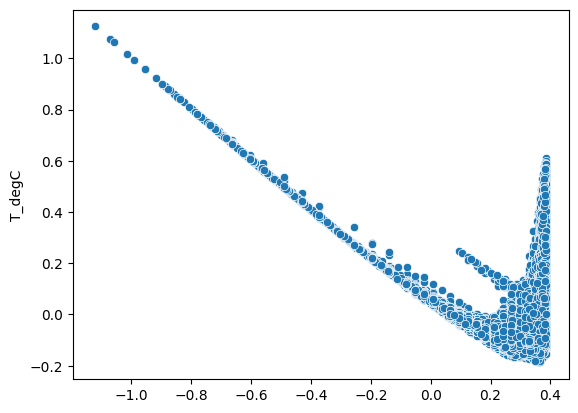

In [82]:
sns.scatterplot(y = x_test_data['T_degC'] - rid_res_T.ravel(), x = rid_res_T.ravel())

#### Полиномальная регрессия 2 степени

In [83]:
b0 = lin2_res_T.ravel()[x_test_data['Depthm'].argmin()]
b1 = lin2_T.coef_.ravel()[0]
b2 = lin2_T.coef_.ravel()[1]
print('Прямая: Y =', b0, '+', b1, 'x +', b2, 'x^2')
print('СКО =', mean_squared_error(x_test_data['T_degC'], lin2_res_T.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['T_degC'], lin2_res_T.ravel()))

Прямая: Y = 0.4312522603044683 + -2.9365958001780093 x + 3.8936875781367055 x^2
СКО = 0.008610726157172599
Коэффициент детерминации R2 = 0.6344356323460679


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='T_degC'>

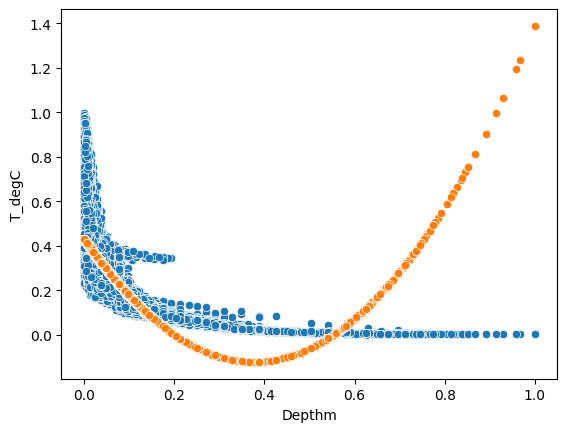

In [84]:
sns.scatterplot(y = x_test_data['T_degC'], x = x_test_data['Depthm'])
sns.scatterplot(y = lin2_res_T.ravel(), x = x_test_data['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='T_degC'>

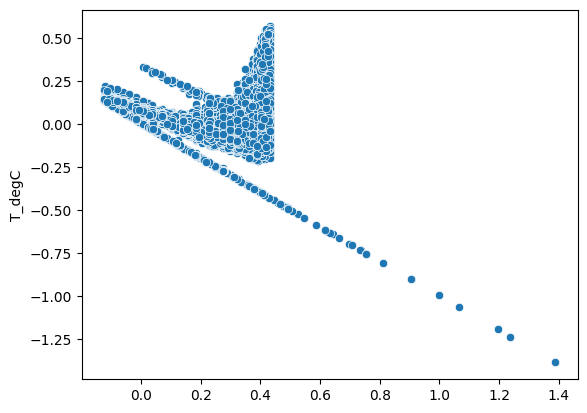

In [85]:
sns.scatterplot(y = x_test_data['T_degC'] - lin2_res_T.ravel(), x = lin2_res_T.ravel())

#### Полиномальная регрессия 3 степени

In [86]:
b0 = lin3_res_T.ravel()[x_test_data['Depthm'].argmin()]
b1 = lin3_T.coef_.ravel()[0]
b2 = lin3_T.coef_.ravel()[1]
b3 = lin3_T.coef_.ravel()[2]
print('Прямая: Y =', b0, '+', b1, 'x +', b2, 'x^2 +', b3, 'x^3')
print('СКО =', mean_squared_error(x_test_data['T_degC'], lin3_res_T.ravel()))
print('Коэффициент детерминации R2 =', r2_score(x_test_data['T_degC'], lin3_res_T.ravel()))

Прямая: Y = 0.4608058454866418 + -4.432611311780574 x + 13.641485715130987 x^2 + -11.737817430947395 x^3
СКО = 0.007118137758259334
Коэффициент детерминации R2 = 0.6978027774923359


C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Depthm', ylabel='T_degC'>

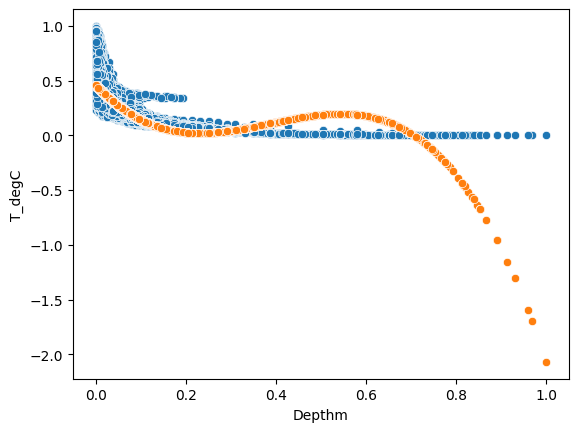

In [87]:
sns.scatterplot(y = x_test_data['T_degC'], x = x_test_data['Depthm'])
sns.scatterplot(y = lin3_res_T.ravel(), x = x_test_data['Depthm'])

C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sivo5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='T_degC'>

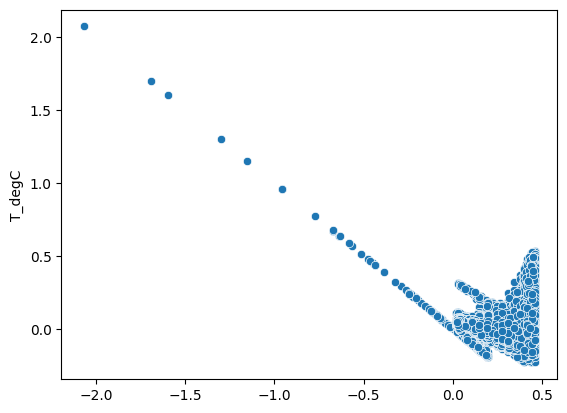

In [88]:
sns.scatterplot(y = x_test_data['T_degC'] - lin3_res_T.ravel(), x = lin3_res_T.ravel())